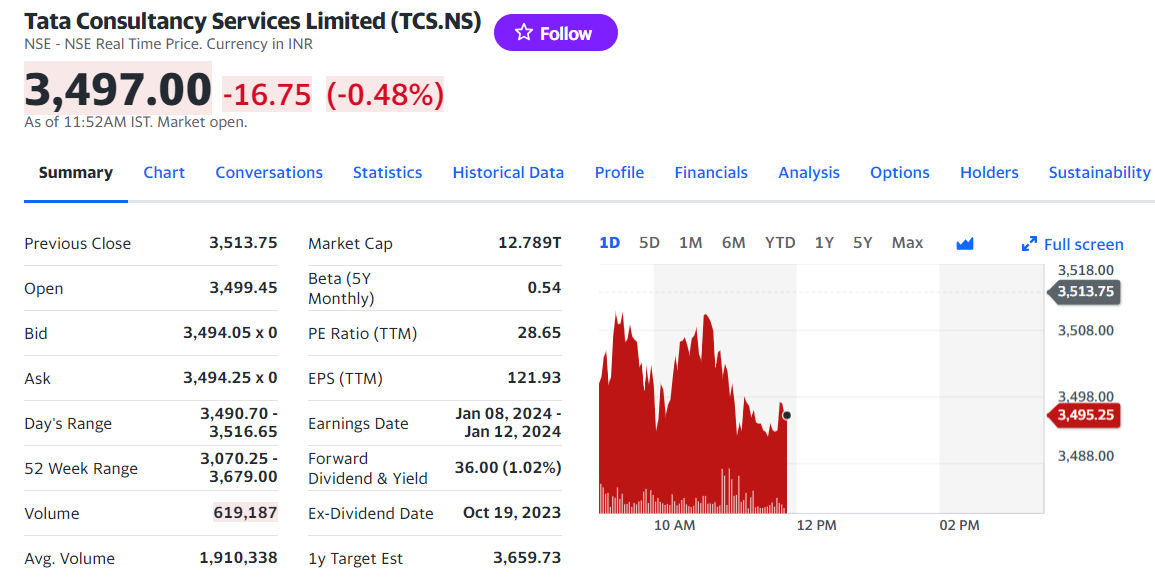

#### Time Series Forecasting using Facebook's Prophet  model
- It is a time series forecasting model developed by Facebook's Core Data Science team implemented in R and Python. It is designed to handle time series data with strong seasonal patterns and multiple seasonality.
- Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

#### Dataset source & brief
- Real time data has been sourced from Yahoo finance.
- This dataset contains five years ranging from 30-11-2018 till 29-11-2023 data of Tata Consultancy Services Limited.
- TCS Ltd. provides information technology (IT) and IT enabled services worldwide. It operates through Banking, Financial Services and Insurance, Manufacturing; Retail and Consumer Business, Communication, Media and Technology, Life Sciences and Healthcare and others segments.

#### Objective
- The objective is to predict Stock prices of TCS using Facebook's Prophet model.

#### Import Basic libraries

In [87]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Install package

In [2]:
!pip install pystan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 MB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 93.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 2.1 MB/s eta 0:00:00


In [88]:
import prophet

#### Load the dataset

In [89]:
df=pd.read_csv('/content/TCS.NS.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-11-30,1966.0,1991.000000,1959.849976,1968.250000,1765.933716,5268901
1,2018-12-03,1984.0,1990.000000,1968.300049,1982.400024,1778.629272,1610576
2,2018-12-04,1983.0,2019.400024,1971.000000,2010.849976,1804.155151,3270615
3,2018-12-05,2006.0,2018.000000,1985.000000,2006.750000,1800.476440,2501539
4,2018-12-06,1998.0,2017.000000,1979.599976,1992.699951,1787.870605,2321216


from matplotlib import pyplot as plt
_df_48['Open'].plot(kind='hist', bins=20, title='Open')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_49['High'].plot(kind='hist', bins=20, title='High')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_50['Low'].plot(kind='hist', bins=20, title='Low')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_51['Close'].plot(kind='hist', bins=20, title='Close')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_52.groupby('Date').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_53.plot(kind='scatter', x='Open', y='High', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_54.plot(kind='scatter', x='High', y='Low', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_55.plot(kind='scatter', x='Low', y='Close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_56.plot(kind='scatter', x='Close', y='Adj Close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Open']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_57.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Date')):
  _plot_series(series, series_name, i)
  fig.legend(title='Date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Open')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['High']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_58.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Date')):
  _plot_series(series, series_name, i)
  fig.legend(title='Date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('High')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Low']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_59.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Date')):
  _plot_series(series, series_name, i)
  fig.legend(title='Date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Low')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Close']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_60.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Date')):
  _plot_series(series, series_name, i)
  fig.legend(title='Date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Close')

from matplotlib import pyplot as plt
_df_61['Open'].plot(kind='line', figsize=(8, 4), title='Open')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_62['High'].plot(kind='line', figsize=(8, 4), title='High')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_63['Low'].plot(kind='line', figsize=(8, 4), title='Low')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_64['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_65['Date'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_65, x='Open', y='Date', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_66['Date'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_66, x='High', y='Date', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_67['Date'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_67, x='Low', y='Date', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_68['Date'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_68, x='Close', y='Date', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [90]:
df.shape

(1235, 7)

- Dataset has 1235 days

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1235 non-null   object 
 1   Open       1235 non-null   float64
 2   High       1235 non-null   float64
 3   Low        1235 non-null   float64
 4   Close      1235 non-null   float64
 5   Adj Close  1235 non-null   float64
 6   Volume     1235 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 67.7+ KB


#### Converting date variable from categorical to numerical form

In [95]:
df['Date'] = pd.to_datetime(df['Date'])

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1235 non-null   datetime64[ns]
 1   Open       1235 non-null   float64       
 2   High       1235 non-null   float64       
 3   Low        1235 non-null   float64       
 4   Close      1235 non-null   float64       
 5   Adj Close  1235 non-null   float64       
 6   Volume     1235 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 67.7 KB


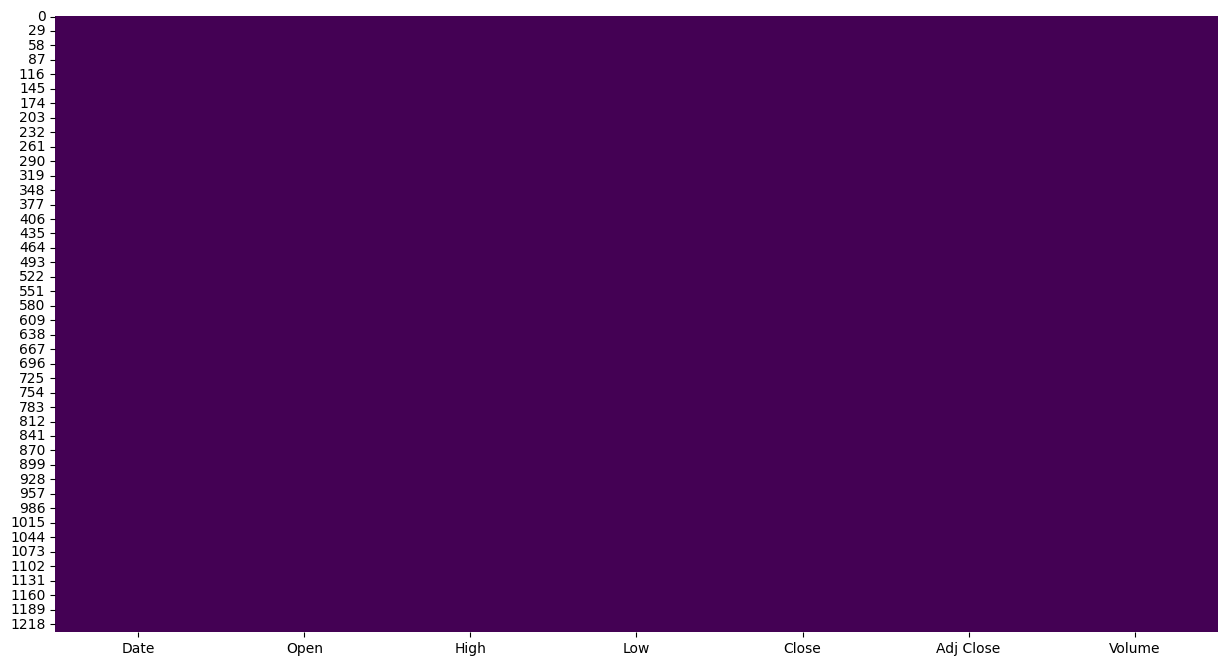

In [97]:
sns.heatmap(df.isnull(),cmap = 'viridis',cbar = False);

- No missing value present

In [98]:
df['Date'].min()

Timestamp('2018-11-30 00:00:00')

In [99]:
df['Date'].max()

Timestamp('2023-11-29 00:00:00')

- Data is already in order.

In [100]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [101]:
df1=df[['Date', 'Close']]
df1.head()

,Date,Close
0,2018-11-30,1968.250000
1,2018-12-03,1982.400024
2,2018-12-04,2010.849976
3,2018-12-05,2006.750000
4,2018-12-06,1992.699951


In [102]:
df1['Date'].nunique()

1235

- Length of dataset is equal to unique value which means no duplicate data present

#### Building Model


- In Prophet model since its univariate time series forecasting so we have to give nomenclature Date as ds and Target variable has to be assigned as  y

In [104]:
df_prophet=df1.rename(columns={'Date':'ds','Close':'y'})
df_prophet

,ds,y
0,2018-11-30,1968.250000
1,2018-12-03,1982.400024
2,2018-12-04,2010.849976
3,2018-12-05,2006.750000
4,2018-12-06,1992.699951
...,...,...
1230,2023-11-22,3530.149902
1231,2023-11-23,3508.250000
1232,2023-11-24,3457.100098
1233,2023-11-28,3470.149902


In [105]:
from prophet import Prophet

In [106]:
m=Prophet()
model=m.fit(df_prophet)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprbbdiuif/dqdke1cy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprbbdiuif/pwyh6t0q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=602', 'data', 'file=/tmp/tmprbbdiuif/dqdke1cy.json', 'init=/tmp/tmprbbdiuif/pwyh6t0q.json', 'output', 'file=/tmp/tmprbbdiuif/prophet_modelwt7i6nks/prophet_model-20231130064323.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:43:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:43:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


#### Seasonality analysis

In [107]:
model.seasonalities

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None}),
             ('weekly',
              {'period': 7,
               'fourier_order': 3,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

#### Predicting 6 months data

In [108]:
six_months_data=model.make_future_dataframe(periods=180,freq='D')
six_months_data

,ds
0,2018-11-30
1,2018-12-03
2,2018-12-04
3,2018-12-05
4,2018-12-06
...,...
1410,2024-05-23
1411,2024-05-24
1412,2024-05-25
1413,2024-05-26


In [109]:
six_months_data.shape

(1415, 1)

- 180 days gets added

In [110]:
prediction=model.predict(six_months_data)
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-11-30,1749.624374,1667.837691,1926.838540,1749.624374,1749.624374,48.644960,48.644960,48.644960,-6.762683,-6.762683,-6.762683,55.407643,55.407643,55.407643,0.0,0.0,0.0,1798.269334
1,2018-12-03,1757.865657,1681.430963,1942.436805,1757.865657,1757.865657,55.078899,55.078899,55.078899,-7.127406,-7.127406,-7.127406,62.206305,62.206305,62.206305,0.0,0.0,0.0,1812.944556
2,2018-12-04,1760.612751,1690.291465,1958.882247,1760.612751,1760.612751,59.825569,59.825569,59.825569,-3.821658,-3.821658,-3.821658,63.647227,63.647227,63.647227,0.0,0.0,0.0,1820.438320
3,2018-12-05,1763.359846,1697.309561,1957.298544,1763.359846,1763.359846,62.823694,62.823694,62.823694,-1.885874,-1.885874,-1.885874,64.709567,64.709567,64.709567,0.0,0.0,0.0,1826.183540
4,2018-12-06,1766.106940,1698.512007,1955.875625,1766.106940,1766.106940,61.590455,61.590455,61.590455,-3.836307,-3.836307,-3.836307,65.426762,65.426762,65.426762,0.0,0.0,0.0,1827.697396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1410,2024-05-23,3676.553074,3336.512362,3779.311872,3494.414975,3874.225792,-117.005301,-117.005301,-117.005301,-3.836307,-3.836307,-3.836307,-113.168994,-113.168994,-113.168994,0.0,0.0,0.0,3559.547773
1411,2024-05-24,3677.432842,3307.924924,3800.298331,3493.536274,3877.197487,-120.038887,-120.038887,-120.038887,-6.762683,-6.762683,-6.762683,-113.276205,-113.276205,-113.276205,0.0,0.0,0.0,3557.393955
1412,2024-05-25,3678.312610,3341.078430,3801.841306,3493.033113,3879.715937,-103.582511,-103.582511,-103.582511,9.655797,9.655797,9.655797,-113.238308,-113.238308,-113.238308,0.0,0.0,0.0,3574.730099
1413,2024-05-26,3679.192378,3343.903446,3804.603522,3492.529952,3883.206921,-99.269957,-99.269957,-99.269957,13.778131,13.778131,13.778131,-113.048088,-113.048088,-113.048088,0.0,0.0,0.0,3579.922421


In [111]:
prediction.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [112]:
prediction[['ds','yhat_lower', 'yhat_upper','yhat']].head()

,ds,yhat_lower,yhat_upper,yhat
0,2018-11-30,1667.837691,1926.838540,1798.269334
1,2018-12-03,1681.430963,1942.436805,1812.944556
2,2018-12-04,1690.291465,1958.882247,1820.438320
3,2018-12-05,1697.309561,1957.298544,1826.183540
4,2018-12-06,1698.512007,1955.875625,1827.697396


In [113]:
prediction[['ds','yhat_lower', 'yhat_upper','yhat']].tail()

,ds,yhat_lower,yhat_upper,yhat
1410,2024-05-23,3336.512362,3779.311872,3559.547773
1411,2024-05-24,3307.924924,3800.298331,3557.393955
1412,2024-05-25,3341.078430,3801.841306,3574.730099
1413,2024-05-26,3343.903446,3804.603522,3579.922421
1414,2024-05-27,3336.074014,3804.832657,3560.245310


#### Visualization

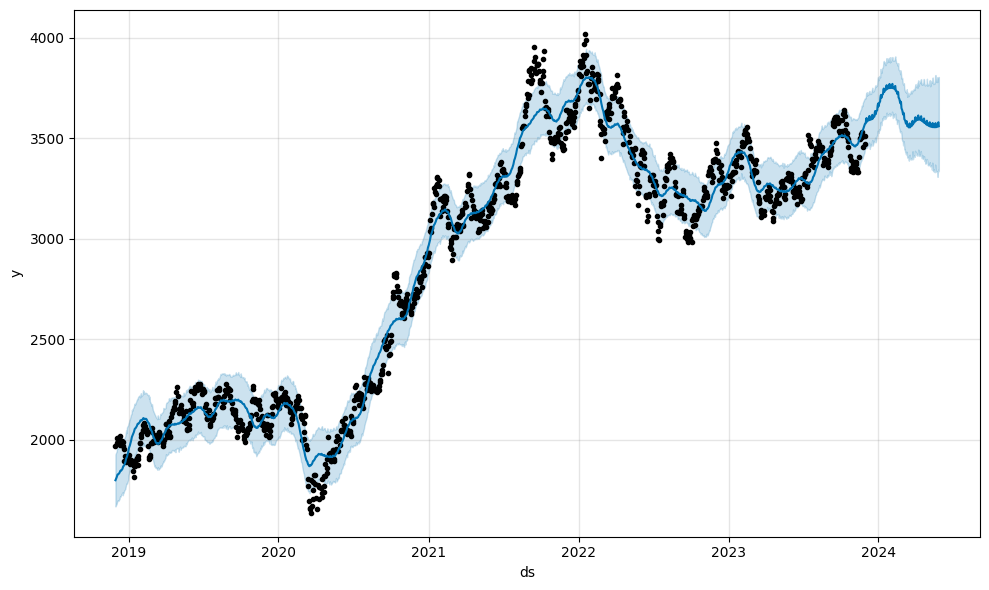

In [114]:
model.plot(prediction)
plt.show()

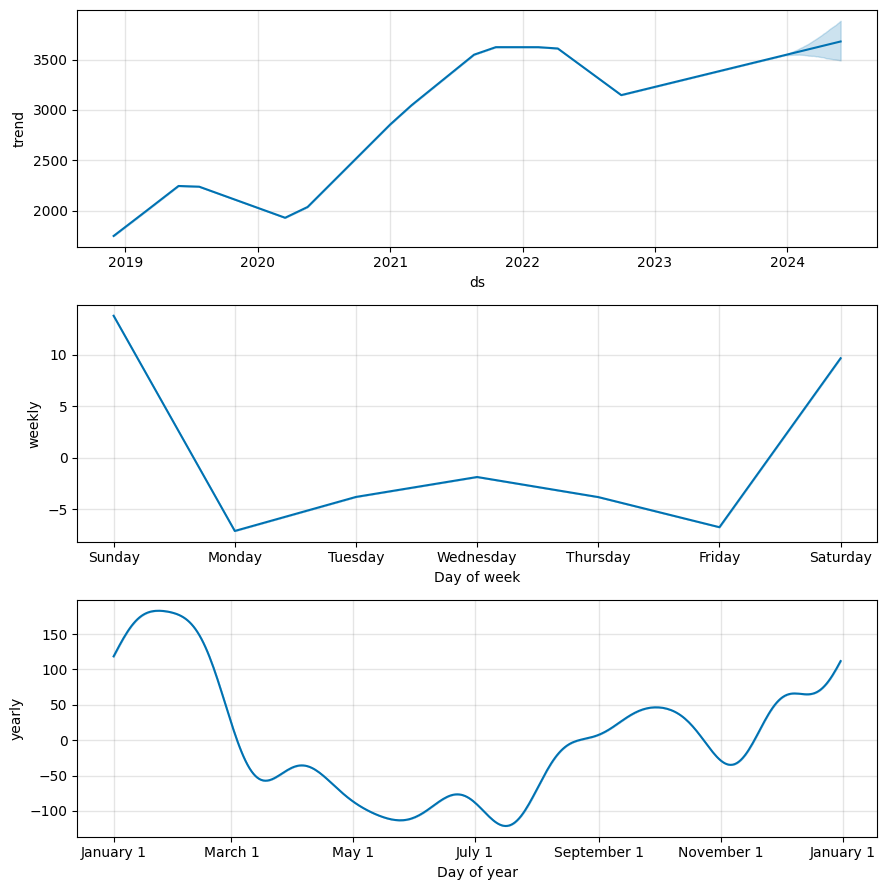

In [115]:
model.plot_components(prediction)
plt.show()

#### Cross validation

In [116]:
from prophet.diagnostics import cross_validation
df_cv=cross_validation(model, horizon='30 days', period='15 days', initial='180 days')

INFO:prophet:Making 108 forecasts with cutoffs between 2019-06-08 00:00:00 and 2023-10-30 00:00:00


  0%|          | 0/108 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmprbbdiuif/f52pl5r6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprbbdiuif/j0re3w7v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70995', 'data', 'file=/tmp/tmprbbdiuif/f52pl5r6.json', 'init=/tmp/tmprbbdiuif/j0re3w7v.json', 'output', 'file=/tmp/tmprbbdiuif/prophet_modeloay_uycp/prophet_model-20231130064404.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:44:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:44:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmprbbdiuif/qvioyltg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprbbdiuif/cev1yrdz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

#### Checking accuracy

In [117]:
from prophet.diagnostics import performance_metrics

In [118]:
df_accuracy=performance_metrics(df_cv)
df_accuracy

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,17109.454748,130.803114,103.834402,0.035354,0.032193,0.035325,0.520178
1,4 days,18584.572381,136.325245,108.618870,0.037203,0.032639,0.037220,0.495187
2,5 days,19501.603664,139.648142,111.539119,0.038298,0.033087,0.038483,0.472759
3,6 days,21662.043595,147.180310,118.708138,0.040551,0.036323,0.040834,0.447801
4,7 days,23750.103075,154.110684,124.495094,0.041751,0.035573,0.042047,0.431350
5,8 days,27493.067873,165.810337,135.489372,0.046058,0.039457,0.046280,0.392571
6,9 days,29733.553186,172.434200,139.995214,0.048609,0.041054,0.048895,0.405405
7,10 days,31062.618483,176.245903,141.750710,0.050688,0.041501,0.051055,0.415025
8,11 days,33292.519556,182.462378,146.684484,0.052489,0.043001,0.053065,0.390719
9,12 days,38484.172951,196.173834,158.631802,0.056556,0.044625,0.057156,0.347580


- MAPE anything less than 10% is a good model.
- Week wise accuracy is very good

In [119]:
from prophet.plot import plot_cross_validation_metric

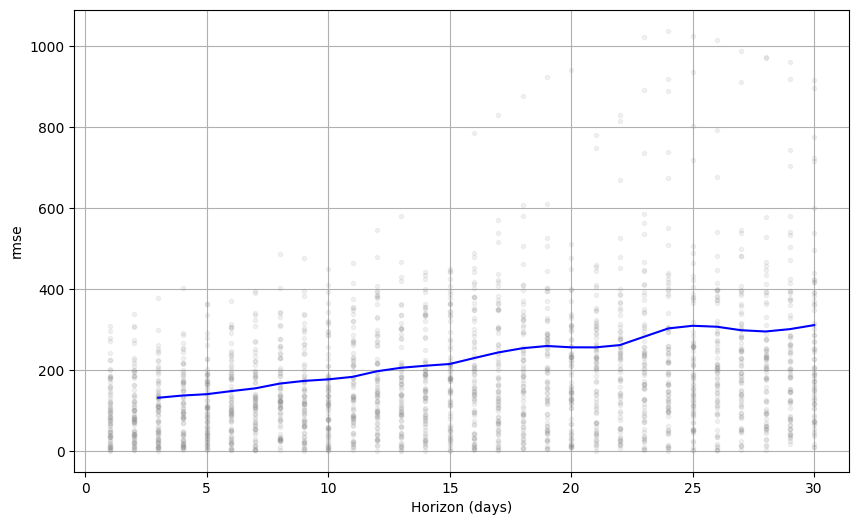

In [120]:
plot_cross_validation_metric(df_cv, metric='rmse')
plt.show()